In [2]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from datetime import datetime
%matplotlib inline

In [6]:
csv = pd.read_csv("data/sales.csv")
sales = pd.DataFrame(csv)
sales.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [7]:
csv = pd.read_csv("data/stores.csv")
stores = pd.DataFrame(csv)
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [8]:
sales = pd.merge(sales, stores, how='left', on='Store')
#sales.set_index('Date',inplace=True)
#sales.index.freq = 'MS'
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [6]:
sales.describe()

,Store,Dept,Weekly_Sales,Size
count,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739
std,12.785297,30.492054,22711.183519,60980.583328
min,1.000000,1.000000,-4988.940000,34875.000000
25%,11.000000,18.000000,2079.650000,93638.000000
50%,22.000000,37.000000,7612.030000,140167.000000
75%,33.000000,74.000000,20205.852500,202505.000000
max,45.000000,99.000000,693099.360000,219622.000000


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 6 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 19.7+ MB


# Holidays

# Total Sales

In [22]:
group = sales.groupby('Date').sum()
group = group.reset_index()
group

,Date,Store,Dept,Weekly_Sales,IsHoliday,Size
0,2010-02-05,65124,130557,49750740.50,0.0,406107232
1,2010-02-12,65082,131179,48336677.63,2956.0,406812940
2,2010-02-19,65610,131897,48276993.78,0.0,408678503
3,2010-02-26,65045,130161,43968571.13,0.0,405309063
4,2010-03-05,64897,129670,46871470.30,0.0,405026220
...,...,...,...,...,...,...
138,2012-09-28,65866,130785,43734899.40,0.0,402858901
139,2012-10-05,66296,132468,47566639.31,0.0,405732233
140,2012-10-12,66453,133371,46128514.25,0.0,407324080
141,2012-10-19,65630,130255,45122410.57,0.0,400883123


In [28]:
group['Date']= pd.to_datetime(group['Date']) 
group

,Date,Store,Dept,Weekly_Sales,IsHoliday,Size
0,2010-02-05,65124,130557,49750740.50,0.0,406107232
1,2010-02-12,65082,131179,48336677.63,2956.0,406812940
2,2010-02-19,65610,131897,48276993.78,0.0,408678503
3,2010-02-26,65045,130161,43968571.13,0.0,405309063
4,2010-03-05,64897,129670,46871470.30,0.0,405026220
...,...,...,...,...,...,...
138,2012-09-28,65866,130785,43734899.40,0.0,402858901
139,2012-10-05,66296,132468,47566639.31,0.0,405732233
140,2012-10-12,66453,133371,46128514.25,0.0,407324080
141,2012-10-19,65630,130255,45122410.57,0.0,400883123


In [38]:
group.query('IsHoliday!=0').index

Int64Index([1, 31, 42, 47, 53, 83, 94, 99, 105, 135], dtype='int64')

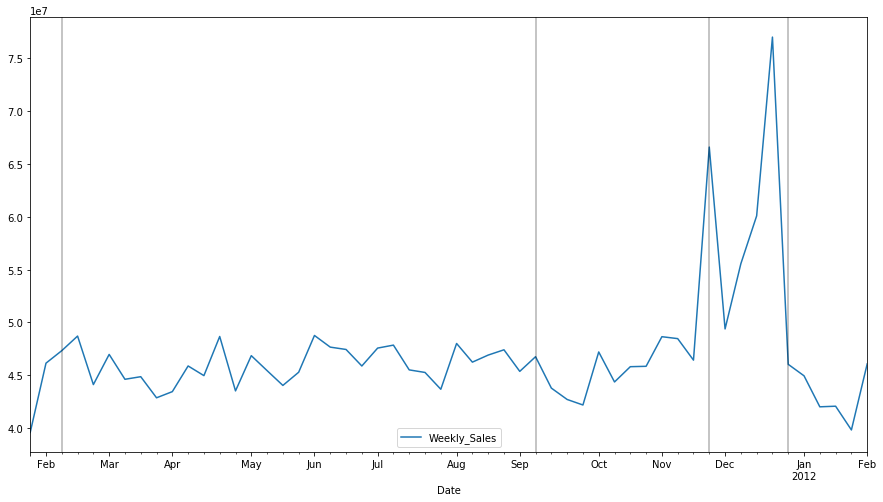

In [45]:


ax = group.iloc[51:105].plot(x='Date', y='Weekly_Sales', figsize=(15,8))
ax.autoscale(axis='x',tight=True)


dates=[]
for x in group.iloc[51:105].query('IsHoliday!=0').index:       # for days where holiday == 1
    holiday = group.iloc[x]['Date']
    dates.append(holiday)
    ax.axvline(x=holiday, color='k', alpha = 0.3);


In [ ]:
#number of store
sales['Store'].nunique()

In [ ]:
#number of departments
sales['Dept'].nunique()

In [ ]:
#number of store types
stores['Type'].nunique()

In [ ]:
sales['Weekly_Sales'].plot(figsize=(15,8))

In [ ]:
#negative sales (loss) observed

In [ ]:
byDept = sales.groupby(['Dept']).sum()
byDept['Weekly_Sales'].plot(kind='bar',figsize=(15,8))

In [ ]:
byDept.query('Weekly_Sales<=0')

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Type', y='Weekly_Sales', data=sales)

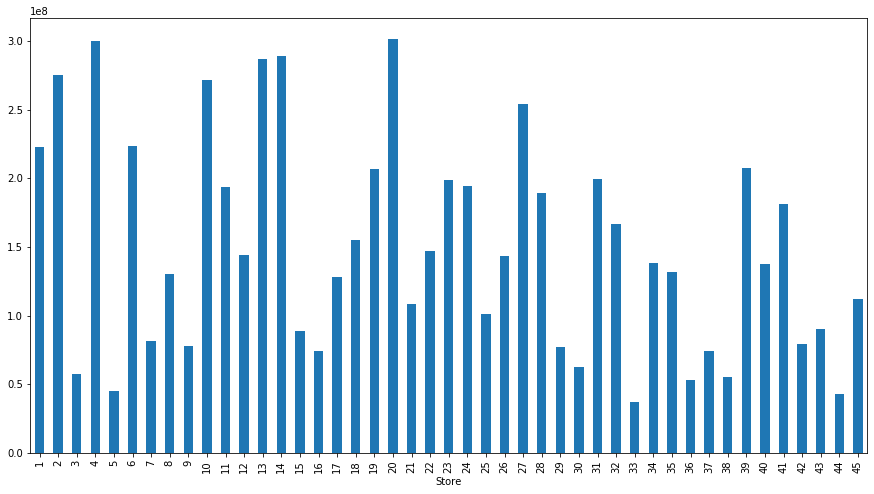

In [8]:
byStore = sales.groupby(['Store']).sum()
byStore['Weekly_Sales'].plot(kind='bar',figsize=(15,8))